In [1]:
import numpy as np
import tables
import os

np.set_printoptions(threshold=np.nan)

In [2]:
os.listdir(os.getcwd()+"/motion_tensors/")

['motion_vectors_brocks2.hdf5',
 'motion_vectors_farneback2.hdf5',
 'motion_vectors_h264.h5',
 'motion_vectors_h264_median.hdf']

In [3]:
brocks_path = os.getcwd()+ "/motion_tensors/" +"motion_vectors_brocks2.hdf5"
farneback_path = os.getcwd()+ "/motion_tensors/" +"motion_vectors_farneback2.hdf5"
#h264_path = os.getcwd()+ "/" +"motion_vectors_h264.h5"

h264_path = os.getcwd()+ "/motion_tensors/" +"motion_vectors_h264_median.hdf"



brocks = tables.open_file(brocks_path, mode='r')
farneback = tables.open_file(farneback_path, mode='r')
h264 = tables.open_file(h264_path, mode='r')

In [4]:
brocks = brocks.root.motion_tensor

In [5]:
farneback = farneback.root.motion_tensor

In [6]:
h264 = h264.root.motion_tensor

In [7]:
#h264 = np.asarray(h264, dtype = np.int32)

In [8]:
n = np.min([h264.shape[0],farneback.shape[0],brocks.shape[0]])
ny = h264.shape[1]
nx = h264.shape[2]

In [9]:
n

30017

In [10]:
def get_sample(component="x", non_zero_only = False):
    """ Subsamples vector components  from the results of (1) the H264 readout, (2) the Farneback results and 
        (3) the results of Brocks algorithm
        args: 
            component: Either "x" or "y". Denotes the vector component.
            non_zero_only (optional): False by default. If true vectors are resampled until one is found where
                                      the H.264 readout (in the respective component) is non-zero
    """
    while(True):
        frame = np.random.randint(0,n)
        if(np.sum(h264[frame])==0):#Skip empty frames
            continue
        else:
            x = np.random.randint(0,nx)
            y = np.random.randint(0,ny)
                    
            if(component=="x"):
                if(non_zero_only):#resample
                    while(True):
                        if(h264[frame,y,x,1]==0):
                            frame = np.random.randint(0,n)
                            x = np.random.randint(0,nx)
                            y = np.random.randint(0,ny)
                        else:
                            break
                return [h264[frame,y,x,0],farneback[frame,y,x,0],brocks[frame,y,x,0]]
            if(component=="y"):
                if(non_zero_only):#resample
                    while(True):
                        if(h264[frame,y,x,0]==0):
                            frame = np.random.randint(0,n)
                            x = np.random.randint(0,nx)
                            y = np.random.randint(0,ny)
                        else:
                            break
                return [h264[frame,y,x,1],farneback[frame,y,x,1],brocks[frame,y,x,1]]

# Y-Component

In [11]:
from scipy import stats

In [12]:
import pickle

In [13]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
sample_set_y = []
n_found = 0
for x in range(10000):
    n_found += 1
    print(n_found)
    sample_set_y.append(get_sample("y", non_zero_only = True))
    clear_output()
    
sample_set_y = np.array(sample_set_y)
#sample_set_y[:,0] = sample_set_y[:,0]/16.0 #Scale down

In [ ]:
y_subsample = "y_subsample"

In [ ]:
file = open(y_subsample, "wb")
#pickle.dump(sample_set_y,file)
file.close()

In [ ]:
plt.scatter(sample_set_y[:,0],sample_set_y[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,1])
plt.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

In [ ]:
plt.scatter(sample_set_y[:,1],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
plt.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

In [ ]:
plt.scatter(sample_set_y[:,0],sample_set_y[:,2])
#plt.ylim(-15, 15)
#plt.xlim(-15, 15)

slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
plt.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

In [ ]:
np.corrcoef(sample_set_y[:,0], sample_set_y[:,1])

In [ ]:
np.corrcoef(sample_set_y[:,1], sample_set_y[:,2])

In [ ]:
np.corrcoef(sample_set_y[:,0], sample_set_y[:,2])

# X Component

In [ ]:
sample_set_x = []
n_found = 0
for x in range(10000):
    n_found += 1
    print(n_found)
    sample_set_x.append(get_sample("x", non_zero_only = True))
    clear_output()
    
sample_set_x = np.array(sample_set_x)
#sample_set_x[:,0] = sample_set_x[:,0]/16.0 #Scale down

In [ ]:
x_subsample = "x_subsample"

In [ ]:
file = open(x_subsample, "wb")
#pickle.dump(sample_set_x,file)
file.close()

In [ ]:
plt.scatter(sample_set_x[:,0],sample_set_x[:,1])


In [ ]:
plt.scatter(sample_set_x[:,1],sample_set_x[:,2])

#plt.xlim(-2.5, 2.5)
#plt.ylim(-2.5, 2.5)

In [ ]:
plt.scatter(sample_set_x[:,0],sample_set_x[:,2])
#plt.xlim(-2.5, 2.5)
#plt.ylim(-2.5, 2.5)

In [ ]:
np.corrcoef(list(sample_set_x[:,0]), sample_set_x[:,1])

In [ ]:
np.corrcoef(sample_set_x[:,1], sample_set_x[:,2])

In [ ]:
np.corrcoef(sample_set_x[:,0], sample_set_x[:,2])

# Combined Scatterplot of subsample

In [ ]:
file = open(y_subsample, "rb")
sample_set_y = pickle.load(file)
file.close()

In [ ]:
file = open(x_subsample, "rb")
sample_set_x = pickle.load(file)
file.close()

In [ ]:
fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)

ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

fig.subplots_adjust(hspace = .4)
fig.suptitle("Fig 1: Comparison between motion vectors obtained with different algorithms", fontsize= 16)


###### Farneback x H.264 (y)
ax2.scatter(sample_set_y[:,0],sample_set_y[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,1])
ax2.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax2.set_title(" H.264  X  Farneback")
ax2.set_ylabel("Farneback result: Vector Y-Component (pixels)")
ax2.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = .45")


##### Farneback x Brocks (y)

ax4.scatter(sample_set_y[:,1],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
ax4.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax4.set_title("Farneback   X   Brocks ")
ax4.set_xlabel("Farneback result: Vector Y-Component (pixels) \n r = .62")
ax4.set_ylabel("Brocks result: Vector Y-Component (pixels)")


#### H.264 x Brocks (y)
ax6.scatter(sample_set_y[:,0],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,2])
ax6.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax6.set_title(" H.264  X  Brocks")
ax6.set_ylabel("Brocks result: Vector Y-Component (pixels)")
ax6.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = .30")

###### Farneback x H.264 (x)
ax1.scatter(sample_set_x[:,0],sample_set_x[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,1])
ax1.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax1.set_title(" H.264  X  Farneback")
ax1.set_ylabel("Farneback result: Vector X-Component (pixels)")
ax1.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r = .25")


##### Farneback x Brocks (x)

ax3.scatter(sample_set_x[:,1],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,1],sample_set_x[:,2])
ax3.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax3.set_title("Farneback   X   Brocks ")
ax3.set_xlabel("Farneback result: Vector X-Component (pixels) \n r = .61")
ax3.set_ylabel("Brocks result: Vector X-Component (pixels)")

#### H.264 x Brocks (x)
ax5.scatter(sample_set_x[:,0],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,2])
ax5.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax5.set_title(" H.264  X  Brocks")
ax5.set_ylabel("Brocks result: Vector X-Component (pixels)")
ax5.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r = .23")



if(True):
    ax1.set_ylim(-10, 10)
    ax1.set_xlim(-20, 20)
    
    ax2.set_ylim(-10, 10)
    ax2.set_xlim(-20, 20)
    
    ax3.set_ylim(-15, 15)
    ax3.set_xlim(-15, 15)
    
    ax4.set_ylim(-15, 15)
    ax4.set_xlim(-15, 15)

    ax5.set_ylim(-10, 10)
    ax5.set_xlim(-20, 20)
    
    ax6.set_ylim(-10, 10)
    ax6.set_xlim(-20, 20)

# Correlation of vectors of single frame

In [ ]:
import matplotlib.pyplot as plt
frame = 327
sampleset_length = 67*120

sample_set_y = np.ndarray(sampleset_length*3).reshape([sampleset_length,3])
sample_set_x = np.ndarray(sampleset_length*3).reshape([sampleset_length,3])

sample_set_x[:,0] = h264[frame,:,:,0].flatten()
sample_set_x[:,1] = farneback[frame,:,:,0].flatten()
sample_set_x[:,2] = brocks[frame,:,:,0].flatten()


sample_set_y[:,0] = h264[frame,:,:,1].flatten()
sample_set_y[:,1] = farneback[frame,:,:,1].flatten()
sample_set_y[:,2] = brocks[frame,:,:,1].flatten()


In [ ]:
sample_set_x = sample_set_x[~(sample_set_x==0.0).any(axis=1)]
sample_set_y = sample_set_y[~(sample_set_y==0.0).any(axis=1)]

#sample_set_x[~np.isnan(sample_set_x).any(axis=1)]

In [ ]:
sample_set_y.shape

In [ ]:
fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)

ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

r1 = np.corrcoef(sample_set_y[:,0],sample_set_y[:,1])[0,1]
r2 = np.corrcoef(sample_set_y[:,1],sample_set_y[:,2])[0,1]
r3 = np.corrcoef(sample_set_y[:,0],sample_set_y[:,2])[0,1]
r4 = np.corrcoef(sample_set_x[:,0],sample_set_x[:,1])[0,1]
r5 = np.corrcoef(sample_set_x[:,1],sample_set_x[:,2])[0,1]
r6 = np.corrcoef(sample_set_x[:,0],sample_set_x[:,2])[0,1]

r1 = "%1.2f"%r1
r2 = "%1.2f"%r2
r3 = "%1.2f"%r3
r4 = "%1.2f"%r4
r5 = "%1.2f"%r5
r6 = "%1.2f"%r6


fig.subplots_adjust(hspace = .4)
fig.suptitle("Fig 1: Comparison between motion vectors obtained with different algorithms", fontsize= 16)


###### Farneback x H.264 (y)
ax2.scatter(sample_set_y[:,0],sample_set_y[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,1])
ax2.plot(np.linspace(-8,8,100), intercept + slope * np.linspace(-8,8,100), '-', color = "black")

ax2.set_title(" H.264  X  Farneback")
ax2.set_ylabel("Farneback result: Vector Y-Component (pixels)")
ax2.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r =" + r1)


##### Farneback x Brocks (y)

ax4.scatter(sample_set_y[:,1],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
ax4.plot(np.linspace(-8,8,100), intercept + slope * np.linspace(-8,8,100), '-', color = "black")

ax4.set_title("Farneback   X   Brocks ")
ax4.set_xlabel("Farneback result: Vector Y-Component (pixels) \n r =" + r2)
ax4.set_ylabel("Brocks result: Vector Y-Component (pixels)")


#### H.264 x Brocks (y)
ax6.scatter(sample_set_y[:,0],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,2])
ax6.plot(np.linspace(-8,8,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax6.set_title(" H.264  X  Brocks")
ax6.set_ylabel("Brocks result: Vector Y-Component (pixels)")
ax6.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = " + r3)

###### Farneback x H.264 (x)
ax1.scatter(sample_set_x[:,0],sample_set_x[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,1])
ax1.plot(np.linspace(-8,8,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax1.set_title(" H.264  X  Farneback")
ax1.set_ylabel("Farneback result: Vector X-Component (pixels)")
ax1.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r =" + r4)


##### Farneback x Brocks (x)

ax3.scatter(sample_set_x[:,1],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,1],sample_set_x[:,2])
ax3.plot(np.linspace(-8,8,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax3.set_title("Farneback   X   Brocks ")
ax3.set_xlabel("Farneback result: Vector X-Component (pixels) \n r =" + r5)
ax3.set_ylabel("Brocks result: Vector X-Component (pixels)")

#### H.264 x Brocks (x)
ax5.scatter(sample_set_x[:,0],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,2])
ax5.plot(np.linspace(-8,8,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax5.set_title(" H.264  X  Brocks")
ax5.set_ylabel("Brocks result: Vector X-Component (pixels)")
ax5.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r =" + r6)



if(False):
    ax1.set_ylim(-10, 10)
    ax1.set_xlim(-20, 20)
    
    ax2.set_ylim(-10, 10)
    ax2.set_xlim(-20, 20)
    
    ax3.set_ylim(-15, 15)
    ax3.set_xlim(-15, 15)
    
    ax4.set_ylim(-15, 15)
    ax4.set_xlim(-15, 15)

    ax5.set_ylim(-10, 10)
    ax5.set_xlim(-20, 20)
    
    ax6.set_ylim(-10, 10)
    ax6.set_xlim(-20, 20)

In [ ]:
fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)

ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

fig.subplots_adjust(hspace = .4)
fig.suptitle("Fig 1: Comparison between motion vectors obtained with different algorithms", fontsize= 16)


###### Farneback x H.264 (y)
ax2.scatter(sample_set_y[:,0],sample_set_y[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,1])
ax2.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax2.set_title(" H.264  X  Farneback")
ax2.set_ylabel("Farneback result: Vector Y-Component (pixels)")
ax2.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = .45")


##### Farneback x Brocks (y)

ax4.scatter(sample_set_y[:,1],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,1],sample_set_y[:,2])
ax4.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax4.set_title("Farneback   X   Brocks ")
ax4.set_xlabel("Farneback result: Vector Y-Component (pixels) \n r = .62")
ax4.set_ylabel("Brocks result: Vector Y-Component (pixels)")


#### H.264 x Brocks (y)
ax6.scatter(sample_set_y[:,0],sample_set_y[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_y[:,0],sample_set_y[:,2])
ax6.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax6.set_title(" H.264  X  Brocks")
ax6.set_ylabel("Brocks result: Vector Y-Component (pixels)")
ax6.set_xlabel("H.264 readout: Vector Y-Component (pixels) \n r = .30")

###### Farneback x H.264 (x)
ax1.scatter(sample_set_x[:,0],sample_set_x[:,1])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,1])
ax1.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax1.set_title(" H.264  X  Farneback")
ax1.set_ylabel("Farneback result: Vector X-Component (pixels)")
ax1.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r = .25")


##### Farneback x Brocks (x)

ax3.scatter(sample_set_x[:,1],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,1],sample_set_x[:,2])
ax3.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax3.set_title("Farneback   X   Brocks ")
ax3.set_xlabel("Farneback result: Vector X-Component (pixels) \n r = .61")
ax3.set_ylabel("Brocks result: Vector X-Component (pixels)")

#### H.264 x Brocks (x)
ax5.scatter(sample_set_x[:,0],sample_set_x[:,2])
slope, intercept, r_value, p_value, std_err = stats.linregress(sample_set_x[:,0],sample_set_x[:,2])
ax5.plot(np.linspace(-20,20,100), intercept + slope * np.linspace(-10,10,100), '-', color = "black")

ax5.set_title(" H.264  X  Brocks")
ax5.set_ylabel("Brocks result: Vector X-Component (pixels)")
ax5.set_xlabel("H.264 readout: Vector X-Component (pixels) \n r = .23")



if(True):
    ax1.set_ylim(-10, 10)
    ax1.set_xlim(-20, 20)
    
    ax2.set_ylim(-10, 10)
    ax2.set_xlim(-20, 20)
    
    ax3.set_ylim(-15, 15)
    ax3.set_xlim(-15, 15)
    
    ax4.set_ylim(-15, 15)
    ax4.set_xlim(-15, 15)

    ax5.set_ylim(-10, 10)
    ax5.set_xlim(-20, 20)
    
    ax6.set_ylim(-10, 10)
    ax6.set_xlim(-20, 20)

# Colormap approach for whole video

In [ ]:
minimum = -25
maximum = 25
h264_x_farneback_x = np.histogram2d(h264[:n,:,:,0].flatten(), 
                     farneback[:n,:,:,0].flatten(), 
                     [100,100], range = [[minimum,maximum],[minimum,maximum]])

In [ ]:
minimum = -25
maximum = 25
h264_x_farneback_y = np.histogram2d(h264[:n,:,:,1].flatten(), 
                     farneback[:n,:,:,1].flatten(), 
                     [100,100], range = [[minimum,maximum],[minimum,maximum]])

In [ ]:
minimum = -25
maximum = 25
h264_x_farneback_x = np.histogram2d(farneback[:n,:,:,0].flatten(), 
                     brocks[:n,:,:,0].flatten(), 
                     [100,100], range = [[minimum,maximum],[minimum,maximum]])

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(h264_x_farneback_x[0], extent=[minimum, maximum, minimum, maximum],vmin = 0, vmax = 10)
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(h264_x_farneback_y[0], extent=[minimum, maximum, minimum, maximum],vmin = 0, vmax = 10)
plt.colorbar()

In [ ]:
np.corrcoef(h264[:n,:,:,0].flatten(), farneback[:n,:,:,0].flatten())

In [ ]:
np.corrcoef(h264[:n,:,:,1].flatten(), farneback[:n,:,:,1].flatten())

# Correlation of Motion Histogram Map in time

In [24]:
import numpy as np
import matplotlib.pyplot as plt
def compute_weighted_histograms(data, frame_range= None, preprocess = False, n_bins = 36):
    if(360%n_bins != 0):
        raise Exception("Provide a number of bins such that 360%bins == 0 (e.g. 36, or 72)")
    bin_width = 360//n_bins
    
    if frame_range:
        data = data[frame_range[0]:frame_range[1]]
    
    outary = np.ndarray((data.shape[0],n_bins))

    for d, i in zip(data, range(data.shape[0])):
        ary = np.array([d[:,:,0].flatten(),d[:,:,1].flatten()])
        deg = np.degrees(np.arctan2(ary[0],ary[1]))#.reshape(d[0].shape[0:2])
        length = np.linalg.norm(ary, axis = 0)#.reshape(d[0].shape[0:2])
        bins = (np.arange(n_bins+1)*bin_width)-180 #start at -170. Go up in steps of 10 to 180
        weightedHist, bin_edges = np.histogram(deg, weights = length, bins = bins)
        outary[i] = weightedHist
        if i%100 == 0:
            print(i/data.shape[0])
    return outary.T

=> Load motion tensors and compute motion histograms

In [25]:
import tables
import os

farneback = os.getcwd() + "/motion_tensors/motion_vectors_farneback2.hdf5"
h264 = os.getcwd() + "/motion_tensors/motion_vectors_h264.h5"
h264_median = os.getcwd() + "/motion_tensors/motion_vectors_h264_median.hdf"


f = tables.open_file(farneback, mode='r')
f1 = tables.open_file(h264, mode='r')
f2 = tables.open_file(h264_median, mode='r')

In [26]:
farneback = f.root.motion_tensor
h264 = f1.root.motion_tensor
h264_median = f2.root.motion_tensor

In [27]:
mothistmap1 = compute_weighted_histograms(farneback,n_bins = 36)
mothistmap2 = compute_weighted_histograms(h264,n_bins = 36)
mothistmap3 = compute_weighted_histograms(h264_median, n_bins = 36)

0.0
0.003331445514208615
0.00666289102841723
0.009994336542625845
0.01332578205683446
0.016657227571043074
0.01998867308525169
0.023320118599460305
0.02665156411366892
0.029983009627877536
0.03331445514208615
0.036645900656294764
0.03997734617050338
0.043308791684711995
0.04664023719892061
0.049971682713129226
0.05330312822733784
0.05663457374154646
0.05996601925575507
0.06329746476996369
0.0666289102841723
0.06996035579838092
0.07329180131258953
0.07662324682679815
0.07995469234100676
0.08328613785521538
0.08661758336942399
0.08994902888363261
0.09328047439784122
0.09661191991204984
0.09994336542625845
0.10327481094046707
0.10660625645467568
0.1099377019688843
0.11326914748309291
0.11660059299730154
0.11993203851151014
0.12326348402571875
0.12659492953992738
0.12992637505413598
0.1332578205683446
0.13658926608255323
0.13992071159676184
0.14325215711097045
0.14658360262517905
0.1499150481393877
0.1532464936535963
0.1565779391678049
0.15990938468201352
0.16324083019622215
0.166572275710

0.41305796135909395
0.4163890739506995
0.41972018654230514
0.4230512991339107
0.42638241172551633
0.4297135243171219
0.4330446369087275
0.4363757495003331
0.4397068620919387
0.4430379746835443
0.4463690872751499
0.4497001998667555
0.4530313124583611
0.4563624250499667
0.4596935376415723
0.4630246502331779
0.46635576282478347
0.4696868754163891
0.47301798800799466
0.4763491005996003
0.47968021319120585
0.4830113257828115
0.48634243837441704
0.48967355096602266
0.49300466355762823
0.49633577614923385
0.4996668887408394
0.502998001332445
0.5063291139240507
0.5096602265156562
0.5129913391072618
0.5163224516988674
0.519653564290473
0.5229846768820786
0.5263157894736842
0.5296469020652899
0.5329780146568954
0.536309127248501
0.5396402398401066
0.5429713524317122
0.5463024650233178
0.5496335776149234
0.5529646902065289
0.5562958027981346
0.5596269153897402
0.5629580279813458
0.5662891405729513
0.569620253164557
0.5729513657561626
0.5762824783477681
0.5796135909393737
0.5829447035309794
0.5862

0.8394403730846103
0.8427714856762158
0.8461025982678214
0.8494337108594271
0.8527648234510327
0.8560959360426382
0.8594270486342438
0.8627581612258495
0.866089273817455
0.8694203864090606
0.8727514990006662
0.8760826115922719
0.8794137241838774
0.882744836775483
0.8860759493670886
0.8894070619586942
0.8927381745502998
0.8960692871419054
0.899400399733511
0.9027315123251166
0.9060626249167222
0.9093937375083277
0.9127248500999334
0.916055962691539
0.9193870752831446
0.9227181878747501
0.9260493004663558
0.9293804130579614
0.9327115256495669
0.9360426382411725
0.9393737508327782
0.9427048634243838
0.9460359760159893
0.9493670886075949
0.9526982011992006
0.9560293137908061
0.9593604263824117
0.9626915389740173
0.966022651565623
0.9693537641572285
0.9726848767488341
0.9760159893404398
0.9793471019320453
0.9826782145236509
0.9860093271152565
0.9893404397068621
0.9926715522984677
0.9960026648900733
0.9993337774816788


In [ ]:
print(mothistmap1.shape)
print(mothistmap2.shape)
print(mothistmap3.shape)


# Inspection of Mothistmap

In [2]:
from scipy import ndimage
from scipy import stats

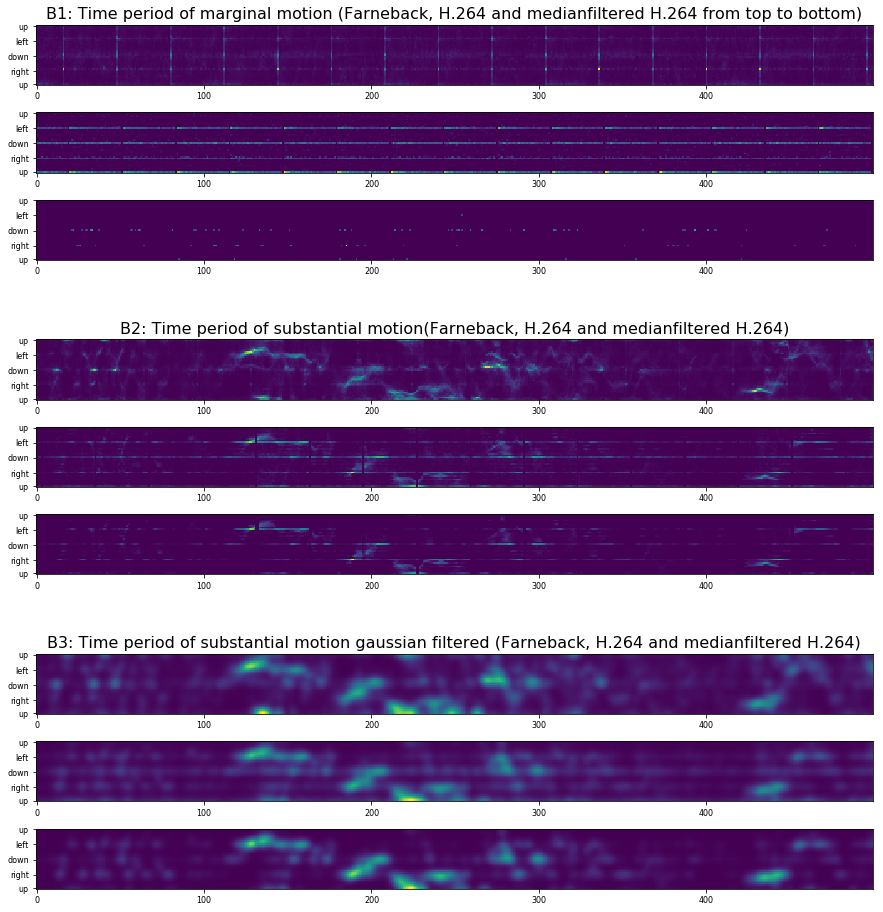

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.ticker as mticker


fig = plt.figure(figsize=(15,15))#create figure
plt.rcParams.update({'font.size': 8})#adjust font-size

# 1. Make some subplots grouped with spaces
subplots = np.empty(shape=(9), dtype=object) # all subplots

main_grid = gridspec.GridSpec(3, 1)#two in y direction one in x direction
group = []


for i in range(3):
    group.append(gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=main_grid[i], hspace=0))
    

for i in range(3):#groups
    for j in range(3):#subplots
        subplots[i*3+j] = fig.add_subplot(group[i][j], sharex=subplots[i*3-3])#, sharex=subplots[0


# 2. Prepare for labeling y axis
labels = ["up","right","down","left","up"]
ticks = [35,27,18,9,0]

def update_ticks(x, pos):
    return labels[pos]

for subplot in subplots:
    subplot.set_yticks(ticks)
    subplot.yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
    
# 3. Add content
imgs = {}

#fig.suptitle('Fig 1: Video Processing', fontsize=15)
imgs[0] = subplots[0].imshow(ndimage.gaussian_filter(mothistmap1[:,2000:2500],0))#farneback (small movement period)
imgs[1] = subplots[1].imshow(ndimage.gaussian_filter(mothistmap2[:,2000:2500],0))#h264
imgs[2] = subplots[2].imshow(ndimage.gaussian_filter(mothistmap3[:,2000:2500],0))#h264 median

imgs[3] = subplots[3].imshow(ndimage.gaussian_filter(mothistmap1[:,0:500],0))#farneback (small movement period)
imgs[4] = subplots[4].imshow(ndimage.gaussian_filter(mothistmap2[:,0:500],0))#h264
imgs[5] = subplots[5].imshow(ndimage.gaussian_filter(mothistmap3[:,0:500],0))#h264

imgs[6] = subplots[6].imshow(ndimage.gaussian_filter(mothistmap1[:,0:500],2))#farneback (small movement period)
imgs[7] = subplots[7].imshow(ndimage.gaussian_filter(mothistmap2[:,0:500],2))#h264
imgs[8] = subplots[8].imshow(ndimage.gaussian_filter(mothistmap3[:,0:500],2))#h264

subplots[0].set_title("B1: Time period of marginal motion "
                      +"(Farneback, H.264 and medianfiltered H.264 from top to bottom)", fontsize=16)
subplots[3].set_title("B2: Time period of substantial motion"
                      +"(Farneback, H.264 and medianfiltered H.264)", fontsize=16)
subplots[6].set_title("B3: Time period of substantial motion gaussian filtered "
                      +"(Farneback, H.264 and medianfiltered H.264)", fontsize=16)

fig.subplots_adjust(top=0.95)

if(False):
    for img, subplot in zip(imgs.values(),subplots):
            plt.colorbar(img, ax = subplot, shrink = .65)

# Mind that contrast is adusted to ensure good visibility: 
# The same color in B indicates that values are about 20x higher then in A.

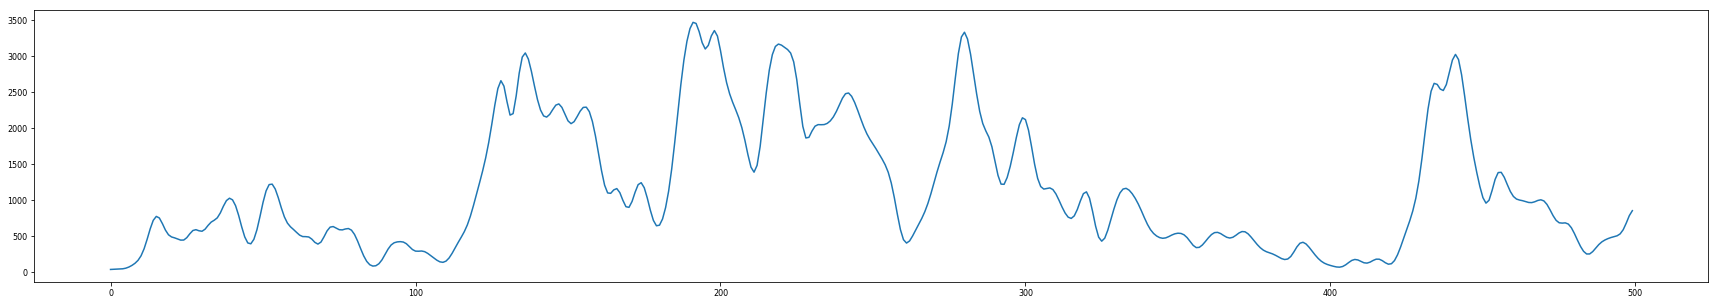

In [29]:
fig = plt.figure(figsize=(30,5))

plt.plot(np.sum(ndimage.gaussian_filter(mothistmap3[:,0:500],2),axis=0))

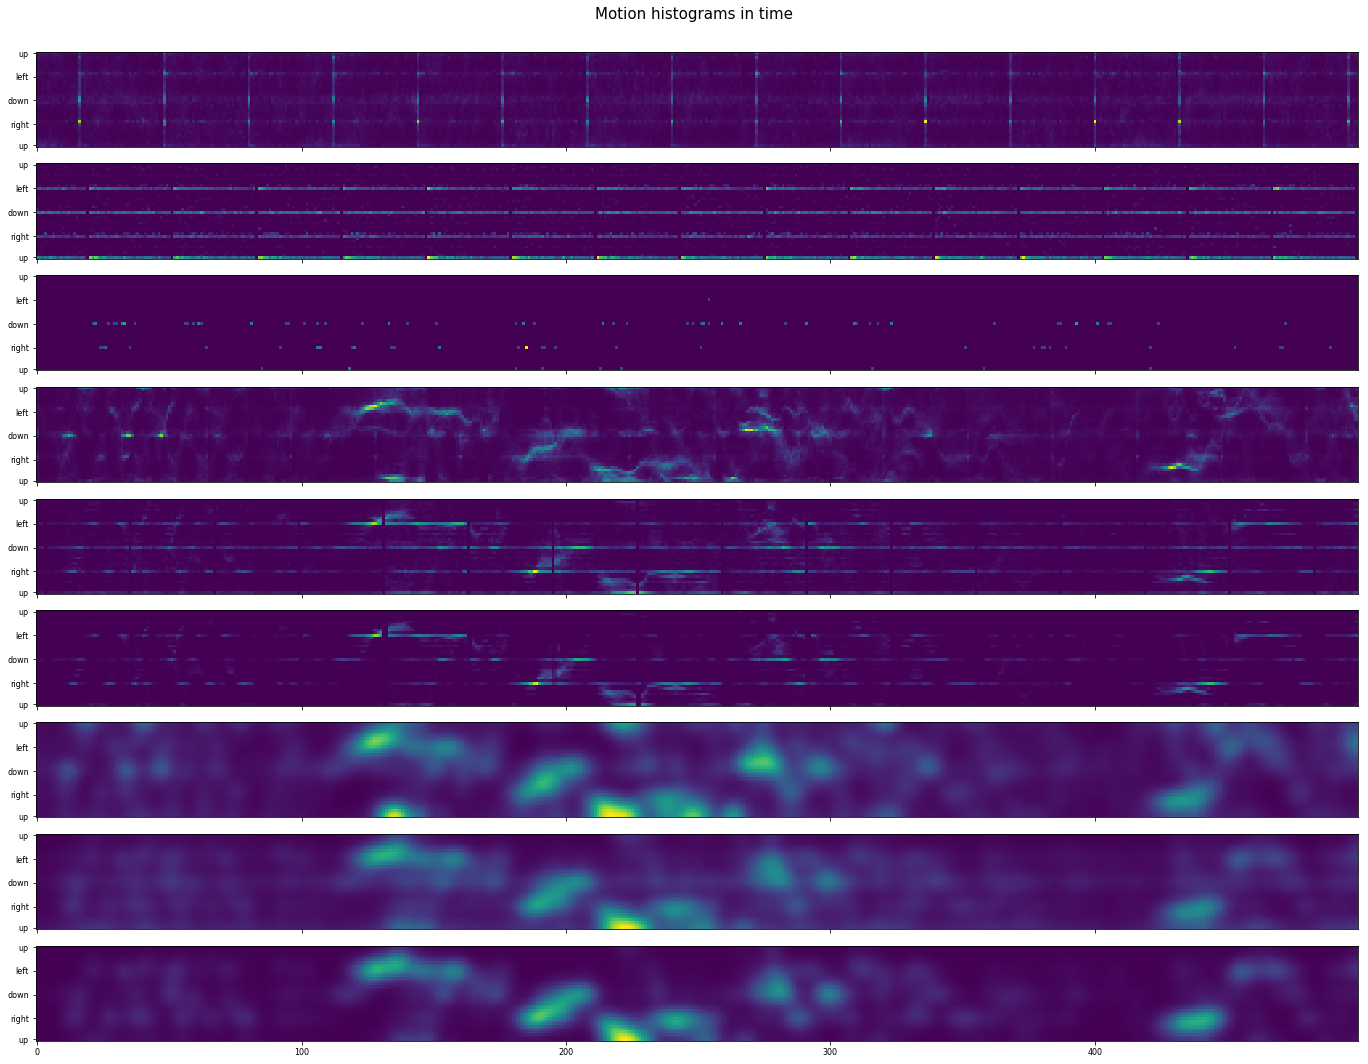

In [22]:
import matplotlib.ticker as mticker

plt.rcParams.update({'font.size': 8})

fig, subplots = plt.subplots(nrows=9, ncols=1,sharex=True, sharey=True, figsize=(20,15))
subplots[0].set_yticks([35,27,18,9,0])

labels = ["up","right","down","left","up"]
subplots[0].set_yticklabels(labels)

def update_ticks(x, pos):
    return labels[pos]
subplots[0].yaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

fig.suptitle('Motion histograms in time', fontsize=15)
subplots[0].imshow(ndimage.gaussian_filter(mothistmap1[:,2000:2500],0))#farneback (small movement period)
subplots[1].imshow(ndimage.gaussian_filter(mothistmap2[:,2000:2500],0))#h264
subplots[2].imshow(ndimage.gaussian_filter(mothistmap3[:,2000:2500],0))#h264

subplots[3].imshow(ndimage.gaussian_filter(mothistmap1[:,0:500],0))#farneback (small movement period)
subplots[4].imshow(ndimage.gaussian_filter(mothistmap2[:,0:500],0))#h264
subplots[5].imshow(ndimage.gaussian_filter(mothistmap3[:,0:500],0))#h264

subplots[6].imshow(ndimage.gaussian_filter(mothistmap1[:,0:500],3))#farneback (small movement period)
subplots[7].imshow(ndimage.gaussian_filter(mothistmap2[:,0:500],3))#h264
subplots[8].imshow(ndimage.gaussian_filter(mothistmap3[:,0:500],3))#h264

plt.tight_layout(rect=[0, 0.0, 1, 0.95])
#plt.tight_layout()
#plt.subplots_adjust(top=0.95)

==> Here we can see that farneback detects movement between movement encoded and full frames (h264)

==> h264 detects noise predominantly in the four main directions (up,down,left,right)

==> Median filtering the motion tensor (Y x X x time) removes these patterns

# Before correlating obtain a 1d signal

In [ ]:
farneback_total_amount = compute_weighted_histograms(farneback,n_bins = 1)
h264_total_amount = compute_weighted_histograms(h264,n_bins = 1)
h264_median_total_amount = compute_weighted_histograms(h264_median, n_bins = 1)

In [232]:
for i in range(mothistmap2.shape[1]):#median
    if(np.all(mothistmap2[:,i]==0)):
        print(i)
        try:
            mothistmap2[:,i] = (mothistmap2[:,i-1]+mothistmap2[:,i+1])/2
        except:
            pass

30019


In [233]:
np.all(mothistmap2[:,0]==0)

False

In [234]:
med_h264_1d = np.sum(ndimage.gaussian_filter(mothistmap3[:,0:30000],3),axis= 0)
h264_1d = np.sum(ndimage.gaussian_filter(mothistmap2[:,0:30000],3),axis= 0)
farneback_1d = np.sum(ndimage.gaussian_filter(mothistmap1[:,0:30000],3),axis= 0)

Correlation between 1d signals (Medianfiltered H.264 and farneback): 0.6770392065228347
Slope of linear regression: 0.8849788490984329
Correlation between 1d signals (H.264 and farneback): 0.7155653232014356
Slope of linear regression: 0.3182681283536243


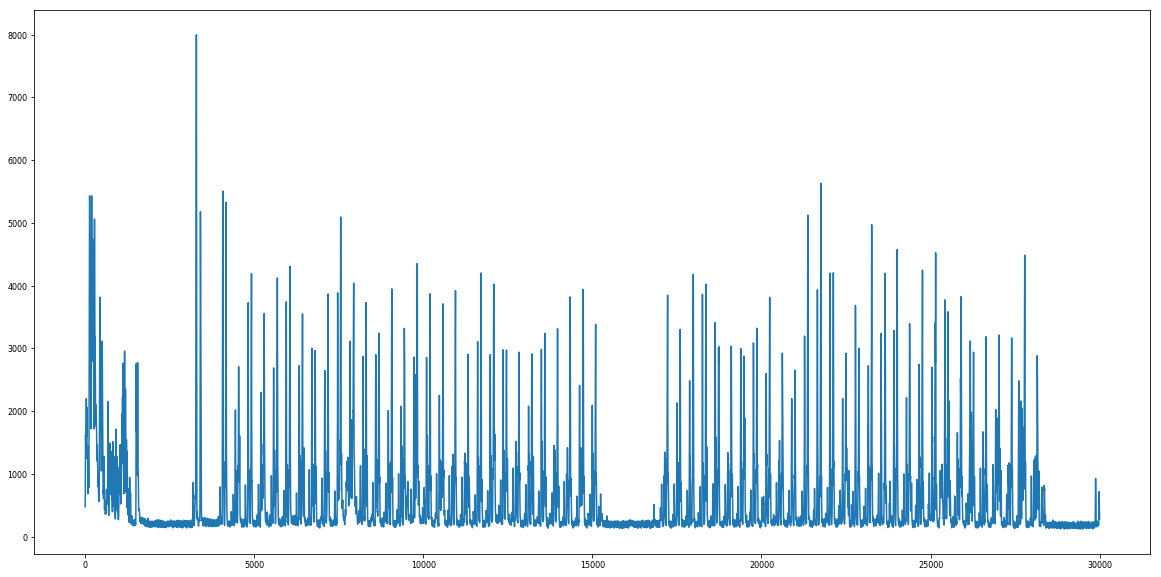

In [236]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
#ax.plot(farneback_1d)
#plt.yscale('log')
ax.plot(h264_1d[0:-1])
#ax.plot(med_h264_1d[0:12000])
#ax.plot(farneback_1d[11000:12000])
#ax.plot(h264_total_amount[0][11000:12000])



slope, intercept, pearsons_r, p_value, std_err = stats.linregress(med_h264_1d,farneback_1d)
print("Correlation between 1d signals (Medianfiltered H.264 and farneback): " + str(pearsons_r) + 
      "\nSlope of linear regression: " +str(slope))

slope, intercept, pearsons_r, p_value, std_err = stats.linregress(h264_1d,farneback_1d)
print("Correlation between 1d signals (H.264 and farneback): " + str(pearsons_r) + 
      "\nSlope of linear regression: " +str(slope))

slope, intercept, pearsons_r, p_value, std_err = stats.linregress(farneback_1d,med_h264_1d)


In [143]:
slope, intercept, pearsons_r, p_value, std_err = stats.linregress(med_h264_1d,h264_median_total_amount[0][:30000])
print(pearsons_r)

0.9392929590289958


==> Postprocessing made a difference

In [140]:
h264_median_total_amount[0][:30000].shape

(30000,)

r = 0.6770392065228347


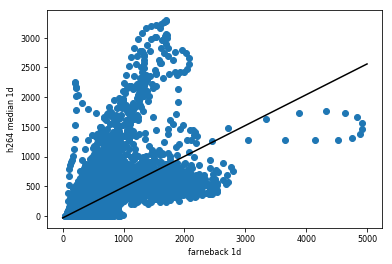

In [125]:
fig, ax = plt.subplots()
ax.scatter(farneback_1d,med_h264_1d)
ax.set_xlabel("farneback 1d")
ax.set_ylabel("h264 median 1d")


slope, intercept, pearsons_r, p_value, std_err = stats.linregress(farneback_1d,med_h264_1d)
ax.plot(np.linspace(0,5000,100), intercept + slope * np.linspace(0,5000,100), '-', color = "black")
print("r = " + str(pearsons_r))

r = 0.7602246041506227


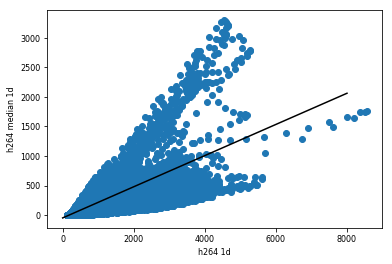

In [128]:
fig, ax = plt.subplots()
ax.scatter(h264_1d,med_h264_1d)
ax.set_xlabel("h264 1d")
ax.set_ylabel("h264 median 1d")


slope, intercept, pearsons_r, p_value, std_err = stats.linregress(h264_1d,med_h264_1d)
ax.plot(np.linspace(0,8000,100), intercept + slope * np.linspace(0,8000,100), '-', color = "black")
print("r = " + str(pearsons_r))

r = 0.7112128365341551


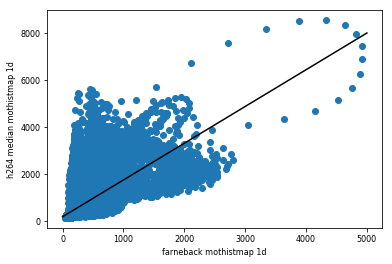

In [127]:
fig, ax = plt.subplots()
ax.scatter(farneback_1d,h264_1d)
ax.set_xlabel("farneback mothistmap 1d")
ax.set_ylabel("h264 median mothistmap 1d")


slope, intercept, pearsons_r, p_value, std_err = stats.linregress(farneback_1d,h264_1d)
ax.plot(np.linspace(0,5000,100), intercept + slope * np.linspace(0,5000,100), '-', color = "black")
print("r = " + str(pearsons_r))

0.10589709336468896


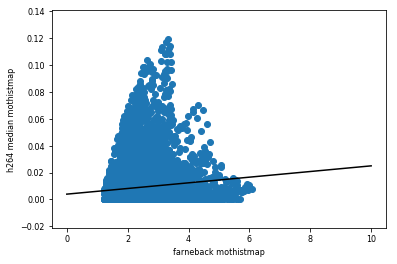

In [75]:
fig, ax = plt.subplots()
farneback_1d = ndimage.gaussian_filter(mothistmap1[:,2000:2200],3).flatten()
h264_median_1d = ndimage.gaussian_filter(mothistmap3[:,2000:2200],3).flatten()
ax.scatter(farneback_1d,h264_median_1d)
ax.set_xlabel("farneback mothistmap")
ax.set_ylabel("h264 median mothistmap")


slope, intercept, pearsons_r, p_value, std_err = stats.linregress(farneback_1d,h264_median_1d)
ax.plot(np.linspace(0,10,100), intercept + slope * np.linspace(0,10,100), '-', color = "black")
print(pearsons_r)

=> For periods where there is no motion there is no correlation (both algorithms generate different noise)

r = 0.7871372543395502
slope = 1.6377665071725251


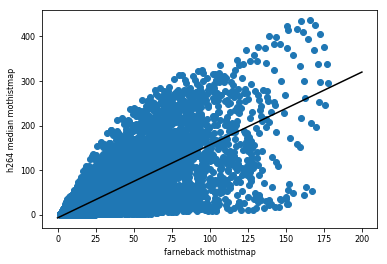

In [77]:
fig, ax = plt.subplots()
farneback_mothistmap = ndimage.gaussian_filter(mothistmap1[:,0:1000],3).flatten()
h264_median_mothistmap = ndimage.gaussian_filter(mothistmap3[:,0:1000],3).flatten()
ax.scatter(farneback_mothistmap,h264_median_mothistmap)
ax.set_xlabel("farneback mothistmap")
ax.set_ylabel("h264 median mothistmap")


slope, intercept, pearsons_r, p_value, std_err = stats.linregress(farneback_mothistmap,h264_median_mothistmap)
ax.plot(np.linspace(0,200,100), intercept + slope * np.linspace(0,200,100), '-', color = "black")
print("r = " + str(pearsons_r))
print("slope = " + str(slope))

=> For periods where there is movement there is a strong correlation (Pearsons r about 0.8)

r = 0.5257272269900666


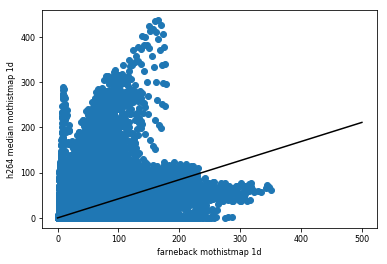

In [119]:
fig, ax = plt.subplots()
farneback_mothistmap = ndimage.gaussian_filter(mothistmap1[:,0:30000],3).flatten()
h264_mothistmap = ndimage.gaussian_filter(mothistmap3[:,0:30000],3).flatten()
ax.scatter(farneback_mothistmap,h264_mothistmap)
ax.set_xlabel("farneback mothistmap 1d")
ax.set_ylabel("h264 median mothistmap 1d")


slope, intercept, pearsons_r, p_value, std_err = stats.linregress(farneback_mothistmap,h264_mothistmap)
ax.plot(np.linspace(0,500,100), intercept + slope * np.linspace(0,500,100), '-', color = "black")
print("r = " + str(pearsons_r))

=> For whole recordings there is still medium strength correlation (Pearsons r about .5)